In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
data = pd.read_csv("DMV_Written_Tests.csv")

In [4]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


(   DMV_Test_1  DMV_Test_2  Results
 0   34.623660   78.024693        0
 1   30.286711   43.894998        0
 2   35.847409   72.902198        0
 3   60.182599   86.308552        1
 4   79.032736   75.344376        1, None)

In [5]:
scores = data.iloc[:, :2].values
results = data.iloc[:, 2].values

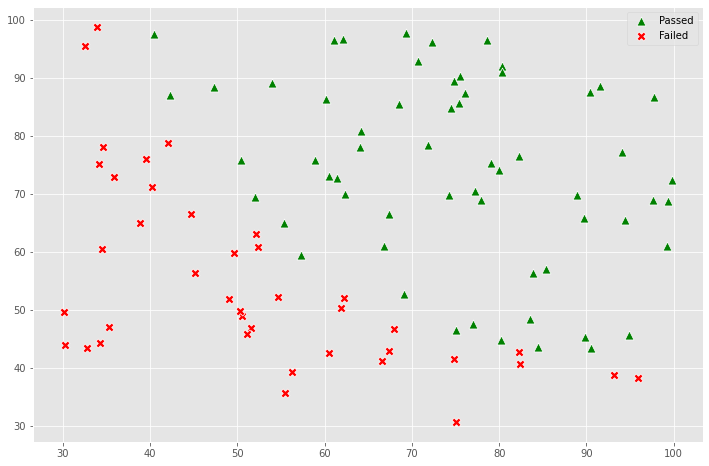

In [6]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
ax = sns.scatterplot(x = scores[passed[:, 0], 0], y = scores[passed[:, 0], 1], 
                     marker = "^", color = "green", s = 80)
sns.scatterplot(x = scores[failed[:, 0], 0], y = scores[failed[:, 0], 1],
                marker = "X", color = "red", s = 80)
ax.legend(['Passed', 'Failed'])

In [7]:
def sigmoid(z):
  o = 1/(1+np.exp(-z))
  return o  

# outputs probability to make a classification problem 

In [8]:
from sklearn.preprocessing import StandardScaler as SS
scores = SS().fit_transform(scores)

In [9]:
rows, cols = scores.shape[0], scores.shape[1]

In [10]:
X = np.append(np.ones((rows, 1)), scores, axis = 1)
y = results.reshape(rows, 1)

In [11]:
# gradient of cost func = 1/m (pred - y) * x
# cost func is - 1/ m * sum of( y * log(pred) + (1 - y) * log (1 - pred))

def cost_func(X, y, theta):
  m = len(y)
  pred = sigmoid(X.dot(theta))
  cost = - (1/m)* sum(y * np.log(pred) + (1-y) * np.log(1 - pred))
  gradient = (1/m) * np.dot(X.T, (pred - y))
  return cost, gradient

In [12]:
theta = np.zeros((cols + 1, 1))
cost, gradient = cost_func(X, y, theta)
print(cost, gradient)

[0.69314718] [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [13]:
def grad_desc(X, y, theta, alpha, iterations):
  costs = []
  for i in range(iterations):
    cost, gradient = cost_func(X, y, theta)
    theta -= (alpha*gradient)
    costs.append(cost)
  return theta, costs

In [14]:
theta, costs = grad_desc(X, y, theta, 1, 200)
print(theta)
print(costs[-1])

[[1.50850586]
 [3.5468762 ]
 [3.29383709]]
[0.20489382]


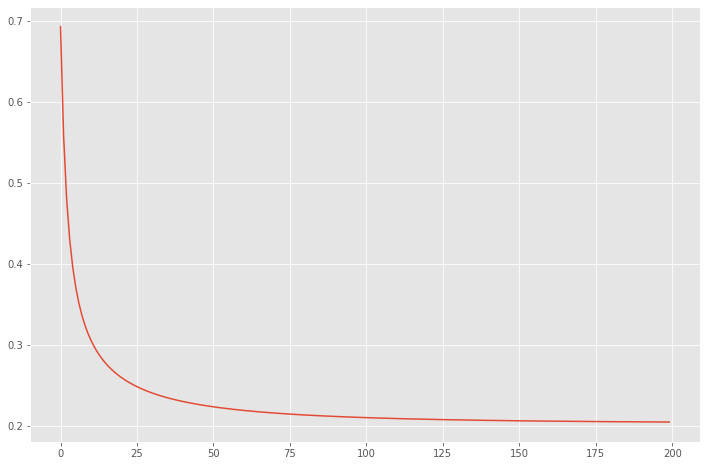

In [15]:
plt.plot(costs)

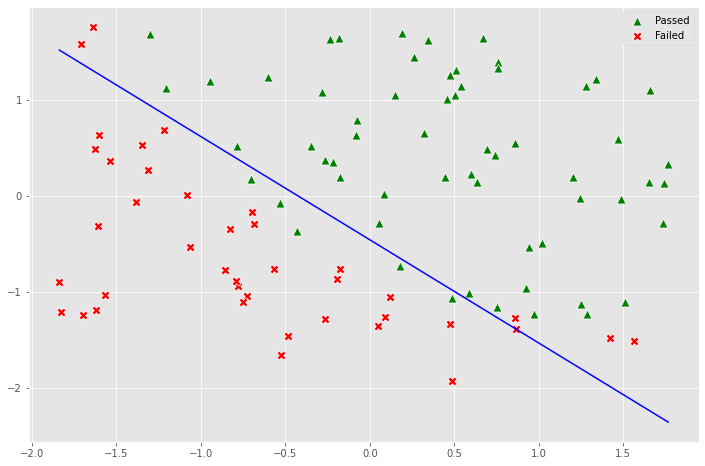

In [16]:
ax = sns.scatterplot(x = X[passed[:, 0], 1], y = X[passed[:, 0], 2], 
                     marker = "^", color = "green", s = 80)
sns.scatterplot(x = X[failed[:, 0], 1], y = X[failed[:, 0], 2],
                marker = "X", color = "red", s = 80)
ax.legend(['Passed', 'Failed'])
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1]*x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color = 'blue')

In [17]:
def predict(x, theta):
  result = x.dot(theta)
  return result > 0

In [18]:
p = predict(X, theta)
print("Accuracy : {}%".format(sum(p==y)))

Accuracy : [89]%
